In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime
import numpy as np

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DWDP','XOM','GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PFE','PG','TRV','UTX','UNH','VZ','V','WMT','DIS']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2010-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [3]:
panel_data.items

Index([u'Adj Close', u'Close', u'High', u'Low', u'Open', u'Volume'], dtype='object')

In [4]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 253 (major_axis) x 30 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2010-12-31 00:00:00 to 2009-12-31 00:00:00
Minor_axis axis: AAPL to XOM

In [6]:
del panel_data['Open']
del panel_data['Close']
del panel_data['High']
del panel_data['Low']

In [7]:
panel_data = panel_data[:,::-1,:]
panel_data[:,:,0] # item date company

,Adj Close,Volume
Date,,
2010-12-31,41.307659,48377000.0
2010-12-30,41.448524,39373600.0
2010-12-29,41.657269,40784800.0
2010-12-28,41.680317,43981000.0
2010-12-27,41.579151,62454000.0
2010-12-23,41.440842,55789300.0
2010-12-22,41.640614,66480400.0
2010-12-21,41.517673,64088500.0
2010-12-20,41.262825,96402600.0


In [12]:
logProf = [[round(math.log(panel_data[0,i,j] / panel_data[0,i-1,j]), 4) for i in range(1,len(panel_data[0,:,j]))] for j in range(len(tickers))]


In [13]:
logProfDF = pd.DataFrame(data=logProf, index= tickers, columns= [(panel_data.axes[1][i].to_datetime().date()) for i in reversed(range(1,len(panel_data.axes[1])))])
logProfDF

,2009-12-31,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2010-12-16,2010-12-17,2010-12-20,2010-12-21,2010-12-22,2010-12-23,2010-12-27,2010-12-28,2010-12-29,2010-12-30
MMM,0.0034,0.0050,0.0006,-0.0024,-0.0033,0.0048,-0.0030,-0.0062,-0.0050,0.0020,...,0.0169,0.0058,-0.0140,0.0114,0.0089,-0.0066,0.0019,0.0160,-0.0017,-0.0154
AXP,-0.0096,0.0082,-0.0016,0.0061,-0.0065,0.0009,0.0098,-0.0170,0.0349,0.0126,...,0.0068,-0.0125,-0.0031,-0.0132,0.0115,0.0007,-0.0161,-0.0160,0.0022,-0.0098
AAPL,-0.0038,0.0006,-0.0029,-0.0017,0.0048,-0.0069,-0.0065,-0.0144,0.0274,-0.0097,...,0.0121,-0.0065,-0.0120,0.0073,0.0119,0.0097,-0.0397,-0.0299,-0.0322,-0.0372
BA,0.0022,-0.0010,-0.0010,0.0040,0.0040,0.0013,0.0006,-0.0142,-0.0076,0.0066,...,0.0237,0.0056,-0.0014,0.0299,-0.0609,-0.0112,-0.0040,-0.0030,-0.0119,-0.0270
CAT,0.0000,0.0010,0.0049,-0.0094,-0.0236,-0.0066,-0.0015,0.0046,-0.0036,0.0102,...,0.0223,-0.0125,-0.0180,0.0160,0.0028,-0.0053,-0.0045,0.0065,0.0045,-0.0308
CVX,0.0038,-0.0025,-0.0020,-0.0118,0.0062,-0.0084,-0.0077,-0.0048,-0.0035,0.0064,...,0.0040,0.0031,0.0076,0.0058,-0.0176,-0.0018,0.0038,-0.0001,-0.0071,-0.0265
CSCO,-0.0008,0.0032,-0.0064,0.0032,0.0059,0.0066,-0.0165,-0.0073,-0.0003,-0.0011,...,0.0136,0.0087,-0.0151,0.0174,0.0164,-0.0016,-0.0003,0.0053,0.0025,0.0056
KO,0.0032,-0.0006,0.0044,-0.0015,0.0023,-0.0012,-0.0085,-0.0071,0.0032,0.0117,...,0.0178,0.0072,0.0036,-0.0032,0.0126,-0.0035,-0.0006,-0.0176,-0.0436,-0.0546
DWDP,-0.0055,0.0044,0.0027,-0.0071,-0.0083,0.0011,-0.0168,-0.0112,0.0000,0.0039,...,0.0157,0.0078,-0.0036,-0.0006,-0.0096,-0.0213,-0.0505,0.0052,-0.0052,-0.0209
XOM,-0.0031,-0.0001,0.0093,0.0038,-0.0132,0.0119,-0.0081,-0.0130,-0.0122,0.0026,...,0.0199,0.0032,-0.0074,0.0220,0.0159,0.0191,-0.0194,0.0107,-0.0175,-0.0248


In [15]:
sales = [[round(panel_data[1,i,j]/1000000, 4) for i in range(1,len(panel_data[0,:,j]))] for j in range(len(tickers))]
salesDF = pd.DataFrame(data= sales, index= tickers, columns= [(panel_data.axes[1][i].to_datetime().date()) for i in reversed(range(1,len(panel_data.axes[1])))])
print 'in millions'
salesDF

in millions


,2009-12-31,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2010-12-16,2010-12-17,2010-12-20,2010-12-21,2010-12-22,2010-12-23,2010-12-27,2010-12-28,2010-12-29,2010-12-30
MMM,39.3736,40.7848,43.9810,62.4540,55.7893,66.4804,64.0885,96.4026,96.7323,80.5077,...,108.2235,151.4730,148.6149,115.5574,111.9027,119.2828,138.0400,150.4762,123.4324,88.1027
AXP,4.3744,3.2537,4.0174,4.4850,4.8306,7.7191,10.3085,31.6179,17.3011,15.3885,...,8.2384,10.1372,12.6573,7.3960,7.9077,8.9817,8.3994,10.6412,6.8943,4.0305
AAPL,2.3429,2.5047,2.6351,2.5485,3.3289,5.2560,5.0929,9.7110,8.8847,5.1691,...,3.0004,4.9504,5.2738,5.6249,7.1466,14.3791,8.8365,8.8678,6.1867,2.1894
BA,2.3255,2.7794,2.9918,2.6202,2.2062,2.6118,4.1082,3.5232,6.4670,4.8634,...,6.2241,8.3987,13.5619,21.9588,6.6513,5.4329,4.7188,5.6972,7.3256,3.8597
CAT,25.5767,32.9770,57.2754,62.0549,41.5992,42.7871,62.3863,49.1135,115.5250,61.2530,...,52.3021,43.6839,35.7804,35.8529,39.1159,31.5312,35.7157,45.1245,59.8537,25.2081
CVX,4.1565,5.3010,5.0581,3.1382,5.0956,4.2624,5.9625,8.0298,10.8328,7.7967,...,6.7210,10.8422,12.1752,11.9168,5.6243,9.6269,11.0146,10.5937,10.1738,4.2466
CSCO,3.4118,5.0970,3.4643,3.5189,4.5060,7.2290,4.7839,5.1141,11.2854,7.6498,...,9.2356,9.6206,14.6183,11.2505,7.6575,8.2021,10.7095,10.3077,13.7004,19.6517
KO,2.9970,4.2428,4.2991,3.8811,4.6028,5.4348,4.9590,5.3191,9.1838,6.3922,...,5.3140,6.2824,10.2748,10.2549,7.7321,10.3256,21.9693,18.7838,16.9330,4.2139
DWDP,28.8943,34.5693,47.7240,33.3180,30.9589,42.9772,41.8370,40.5486,65.2506,53.9153,...,57.3615,65.3424,64.6228,76.6754,115.1126,185.4723,55.4649,64.5506,67.0799,44.5316
XOM,1.7454,3.3298,2.8629,2.7150,2.4940,3.8585,4.5469,3.7191,5.3430,4.1644,...,10.5214,11.2695,10.3601,7.7049,7.2681,8.7274,7.3811,11.6594,9.1350,6.4018


In [130]:
len(sales[0])

252

In [17]:
def histPlotter(companies):
    for company in companies:
        plt.hist(logProf[company],bins= int(math.sqrt(len(logProf[company]))))
    plt.show()

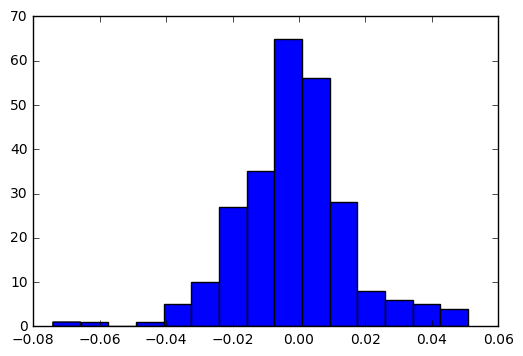

In [34]:
histPlotter([0,])

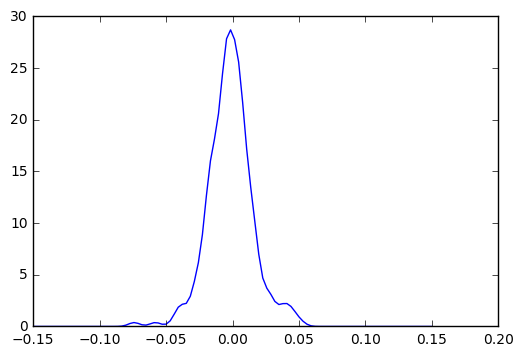

In [41]:
from scipy.stats import gaussian_kde

comp = 0

density = gaussian_kde(logProf[comp])
xs = np.linspace(-0.15,0.15,100)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

In [27]:
n0 = len(logProf[0])
n1 = len(logProf[1])
k = n0 + n1 - 2
k
p = 0.12
p

0.12

In [69]:
def E(data, comp):
    return round(sum(data[comp])/len(data[comp]), 4)

def D(data, comp):
    e = E(data, comp)
    s = 0
    for k in range(len(data[comp])):
        s = pow(data[comp][k] - e, 2)
    d = round(1.0/(len(data[comp])-1)*s, 8)
    return d 

In [70]:
e = E(logProf, 1)
d = D(logProf, 1)

print e
print d

-0.0003
3.6e-07


In [60]:
R = np.zeros([len(logProf),len(logProf)])

for i in range(len(logProf)):
    for j in range(len(logProf)):
    
        indX = i
        indY = j

        Ea = round(sum(logProf[indX])/len(logProf[indX]), 4)
        Eb = round(sum(logProf[indY])/len(logProf[indY]), 4)
        a = 0
        b = 0
        for k in range(len(logProf[indX])):
            a = a + (logProf[indX][k]-Ea)*(logProf[indY][k]-Eb)
            b = b + math.sqrt( math.pow((logProf[indX][k]-Ea),2) * math.pow( (logProf[indY][k]-Eb), 2) )

        R[i,j] = a/b
        
R 


array([[ 1.        ,  0.72712808,  0.73587765,  0.78659779,  0.84352985,
         0.75446115,  0.70088639,  0.78343003,  0.71508758,  0.58471393,
         0.67512631,  0.77464733,  0.75590147,  0.65824828,  0.63491131,
         0.64226121,  0.68596892,  0.79965141,  0.55645122,  0.768341  ,
         0.7850257 ,  0.64846088,  0.63675022,  0.70307213,  0.55794246,
         0.78773818,  0.5934506 ,  0.59333023,  0.52126758,  0.7274625 ],
       [ 0.72712808,  1.        ,  0.82234119,  0.81909648,  0.78722836,
         0.79972647,  0.77791722,  0.84403958,  0.84089576,  0.74797622,
         0.8149106 ,  0.8219919 ,  0.79286831,  0.6831409 ,  0.85926813,
         0.62551447,  0.68046723,  0.79839227,  0.72843313,  0.78614245,
         0.82794745,  0.67073544,  0.59801071,  0.74470958,  0.53616896,
         0.82756771,  0.73447216,  0.61893413,  0.50543338,  0.80798389],
       [ 0.73587765,  0.82234119,  1.        ,  0.77184342,  0.78866067,
         0.77137306,  0.79044702,  0.866914  ,  0

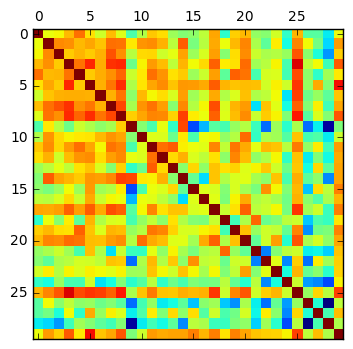

In [25]:
plt.matshow(R)
plt.show()

In [29]:
RDF = pd.DataFrame(data=R, index=tickers, columns=tickers)
RDF

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DWDP,XOM,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,DIS
MMM,1.000000,0.727128,0.735878,0.786598,0.843530,0.754461,0.700886,0.783430,0.715088,0.584714,...,0.785026,0.648461,0.636750,0.703072,0.557942,0.787738,0.593451,0.593330,0.521268,0.727462
AXP,0.727128,1.000000,0.822341,0.819096,0.787228,0.799726,0.777917,0.844040,0.840896,0.747976,...,0.827947,0.670735,0.598011,0.744710,0.536169,0.827568,0.734472,0.618934,0.505433,0.807984
AAPL,0.735878,0.822341,1.000000,0.771843,0.788661,0.771373,0.790447,0.866914,0.817917,0.681187,...,0.819954,0.697518,0.669550,0.678492,0.653193,0.865008,0.641259,0.540335,0.459993,0.767196
BA,0.786598,0.819096,0.771843,1.000000,0.841807,0.901581,0.795322,0.893066,0.898316,0.613930,...,0.846350,0.659495,0.681596,0.738784,0.580014,0.940063,0.686318,0.732021,0.569429,0.860659
CAT,0.843530,0.787228,0.788661,0.841807,1.000000,0.771013,0.793493,0.819272,0.853687,0.699881,...,0.841954,0.578286,0.706891,0.712361,0.576612,0.872200,0.641838,0.556329,0.661837,0.747131
CVX,0.754461,0.799726,0.771373,0.901581,0.771013,1.000000,0.790280,0.837491,0.895161,0.671926,...,0.782445,0.780349,0.705072,0.743255,0.701788,0.890989,0.651857,0.796203,0.633091,0.922452
CSCO,0.700886,0.777917,0.790447,0.795322,0.793493,0.790280,1.000000,0.792545,0.841698,0.644575,...,0.781276,0.672525,0.687336,0.734114,0.514515,0.883466,0.613135,0.651542,0.600114,0.775789
KO,0.783430,0.844040,0.866914,0.893066,0.819272,0.837491,0.792545,1.000000,0.876367,0.665672,...,0.809397,0.512558,0.776321,0.719024,0.536208,0.856772,0.633354,0.742374,0.572753,0.800247
DWDP,0.715088,0.840896,0.817917,0.898316,0.853687,0.895161,0.841698,0.876367,1.000000,0.767887,...,0.822098,0.696987,0.770136,0.738131,0.632002,0.913131,0.594908,0.713405,0.635816,0.864104
XOM,0.584714,0.747976,0.681187,0.613930,0.699881,0.671926,0.644575,0.665672,0.767887,1.000000,...,0.677412,0.568473,0.428026,0.656899,0.553682,0.670219,0.426723,0.524922,0.274683,0.629993


In [28]:
print R.min()
print p

0.254263917672
0.12


все зависимы

попробуем линейную регрессию

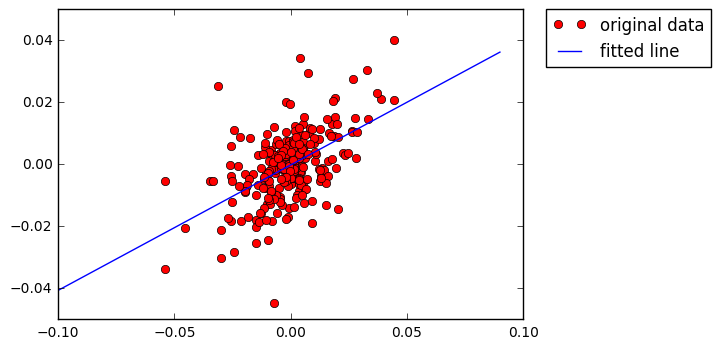

In [104]:
from scipy import stats
import numpy as np

A = 10
B = 11
slope, intercept, r_value, p_value, std_err = stats.linregress(logProf[A],logProf[B])
x = np.arange(-0.1,0.1, 0.01)
plt.plot(logProf[A], logProf[B], 'ro', label='original data')
plt.plot(x, intercept + slope*x, 'b', label='fitted line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

тест хи квадрат

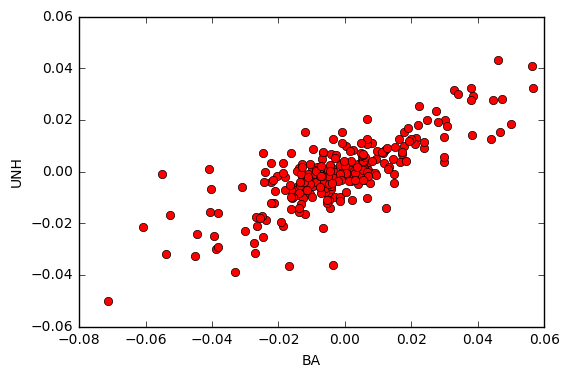

In [220]:
#6th question
compA = 3
compB = 25
plt.plot(logProf[compA],logProf[compB], 'ro', label='profi/sales',)
plt.xlabel(tickers[compA])
plt.ylabel(tickers[compB])
plt.show()

категоризиуем признаки

In [232]:
catProf = [[np.sign(logProf[i][j]) for j in range(len(logProf[0]))] for i in range(len(logProf))]

avgSale = [sum(sales[i])/len(sales[i]) for i in range(len(sales))] 
catSales = [[1 if (sales[i][j] >= avgSale[i]) else -1 for j in range(len(sales[i]))] for i in range(len(sales))]

In [240]:
df = pd.DataFrame({'profs':catProf[0], 'sales':catSales[0]})
ctab = pd.crosstab(index=df.profs, columns=df.sales)
print ctab

sales  -1   1
profs        
-1.0   86  56
 1.0   62  48


-1 for sales means that amount is less than usual

-1 for profs means that we suffer losses

In [243]:
import scipy
chi2, prob, df, expected = scipy.stats.chi2_contingency(ctab.values)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))

print(expected)

test Statistics: 0.29442602506
degrees of freedom: 1
p-value: 0.587398090277

[[ 83.3968254  58.6031746]
 [ 64.6031746  45.3968254]]
